## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')
#Import the required ML libraries
from sklearn.metrics import roc_auc_score,f1_score,roc_curve
from sklearn.metrics import confusion_matrix, classification_report,recall_score,precision_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE,RFECV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

## Data Description

In [2]:
data_discription = pd.read_csv('Data+Description+-+Sheet1.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [3]:
data_discription

,Variable,Description
0,click:,0/1 for non-click/click
1,"hour: format is YYMMDDHH, so 14091123 means 23...",NaN
2,C1,anonymized categorical variable
3,banner_pos,position of the ad/banner on the page
4,site_id,unique id of the site on which the ad is shown
5,site_domain,unique domain of the site on which the ad is s...
6,site_category,category of the site on which the ad is shown
7,app_id,app id of the site on which the ad is shown
8,app_domain,app category of the site on which the ad is shown
9,app_category,category id of the site on which the ad is shown


## Load Data

In [4]:
df = pd.read_csv('data.csv')

In [5]:
pd.set_option('display.max_rows',None)

In [6]:
df.head(20)

,click,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
0,False,1005,1,856e6d3f,58a89a43,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,962c8333,be6db1d7,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0
1,True,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,5b1f94b9,1b13b020,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1
2,False,1005,0,e3c09f3a,d262cf1e,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,a9a84f4c,9a45a8e8,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0
3,False,1002,0,0da94452,248e439f,50e219e0,ecad2386,7801e8d9,07d7df22,0fa578fd,88c62dad,ea6abc60,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0
4,True,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,1e5e0d0e,36d749e5,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1
5,False,1005,1,d9750ee7,98572c79,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,7440e233,84ebbcd4,1,0,17614,320,50,1993,2,1063,100084,33,10,3,30,17,0
6,False,1005,0,83a0ad1a,5c9ae867,f028772b,ecad2386,7801e8d9,07d7df22,a99f214a,285aa37d,03683bd4,1,0,23369,320,50,2680,3,815,100156,42,10,3,30,7,0
7,False,1005,0,85f751fd,c4e18dd6,50e219e0,98fed791,d9b5648e,0f2161f8,a99f214a,140c5171,f51246a7,1,0,20984,320,50,2371,0,559,100217,46,10,3,30,10,0
8,False,1005,0,85f751fd,c4e18dd6,50e219e0,fc6dc16f,5c5a694b,0f2161f8,848ff98a,45867dad,b4d21d55,1,2,20392,320,50,2340,3,41,100111,159,10,5,25,15,0
9,False,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,a99f214a,ac116eec,5096d134,1,0,15705,320,50,1722,0,35,-1,79,10,4,24,16,0


## Data understanding and its characteristics

In [7]:
df.shape

(99999, 27)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

In [9]:
df.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000
mean,1004.967550,0.289943,1.01639,0.329453,18857.231732,318.834548,60.278743,2114.613036,1.439904,227.234932,53292.001950,83.163542,10.0,2.592836,25.485755,11.300673,0.169802
std,1.091916,0.505707,0.53110,0.854673,4944.919482,21.510752,47.713436,607.469442,1.326824,351.472366,49952.340367,70.161076,0.0,1.723003,2.968520,5.938725,0.375460
min,1001.000000,0.000000,0.00000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,10.0,0.000000,21.000000,0.000000,0.000000
25%,1005.000000,0.000000,1.00000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,10.0,1.000000,23.000000,7.000000,0.000000
50%,1005.000000,0.000000,1.00000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,10.0,2.000000,26.000000,11.000000,0.000000
75%,1005.000000,1.000000,1.00000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100093.000000,101.000000,10.0,4.000000,28.000000,16.000000,0.000000
max,1012.000000,7.000000,5.00000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,10.0,6.000000,30.000000,23.000000,1.000000


In [10]:
df.isnull().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

In [11]:
df.columns

Index(['click', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category',
       'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip',
       'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16',
       'C17', 'C18', 'C19', 'C20', 'C21', 'month', 'dayofweek', 'day', 'hour',
       'y'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   click             99999 non-null  bool  
 1   C1                99999 non-null  int64 
 2   banner_pos        99999 non-null  int64 
 3   site_id           99999 non-null  object
 4   site_domain       99999 non-null  object
 5   site_category     99999 non-null  object
 6   app_id            99999 non-null  object
 7   app_domain        99999 non-null  object
 8   app_category      99999 non-null  object
 9   device_id         99999 non-null  object
 10  device_ip         99999 non-null  object
 11  device_model      99999 non-null  object
 12  device_type       99999 non-null  int64 
 13  device_conn_type  99999 non-null  int64 
 14  C14               99999 non-null  int64 
 15  C15               99999 non-null  int64 
 16  C16               99999 non-null  int64 
 17  C17         

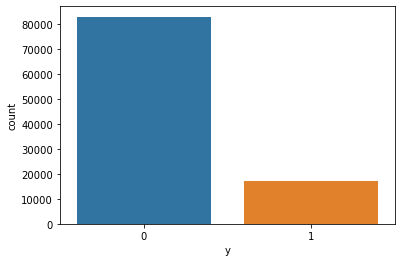

In [13]:
plt.figure()
sb.countplot(x='y', data=df)
plt.show()

In [14]:
df.y.value_counts(normalize=True)*100

0    83.01983
1    16.98017
Name: y, dtype: float64

### Highly imbalance target variable data

## EDA - Exploratory Data Analysis

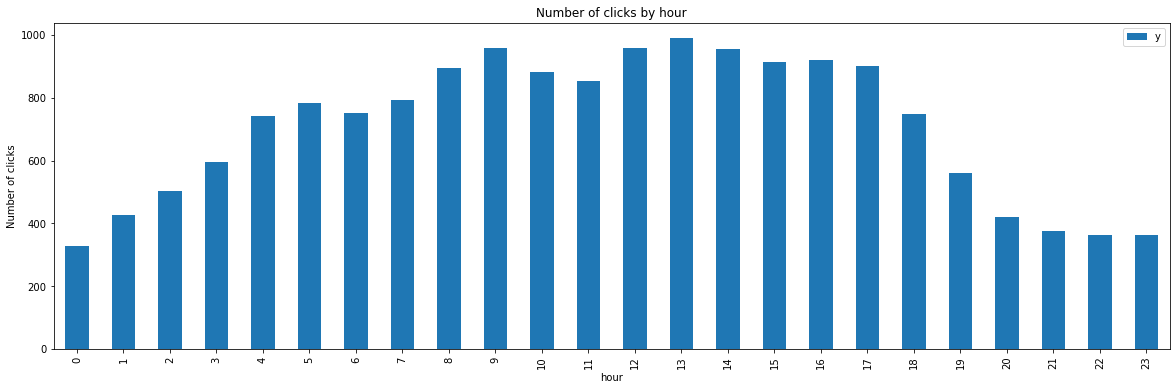

In [15]:
df.groupby('hour').agg({'y':'sum'}).plot(kind='bar', title='Number of clicks by hour', ylabel='Number of clicks',figsize=(20,6))
plt.show()

##### In general, the highest number of clicks are at hour 9,12,13 & 14 and the least number of clicks is at hour 0 (mid-night). It seems a useful feature for roughly estimation.

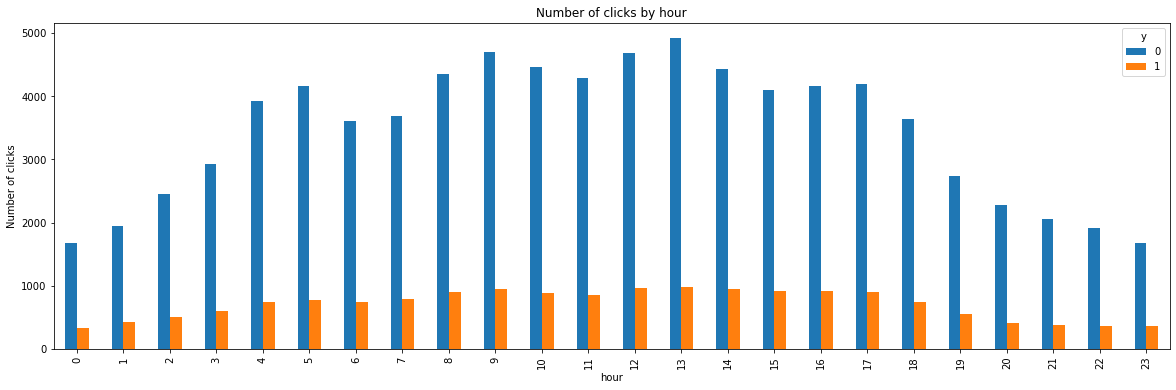

In [16]:
df.groupby(['hour','y']).size().unstack().plot(kind='bar', title='Number of clicks by hour', ylabel='Number of clicks',figsize=(20,6))
plt.show()

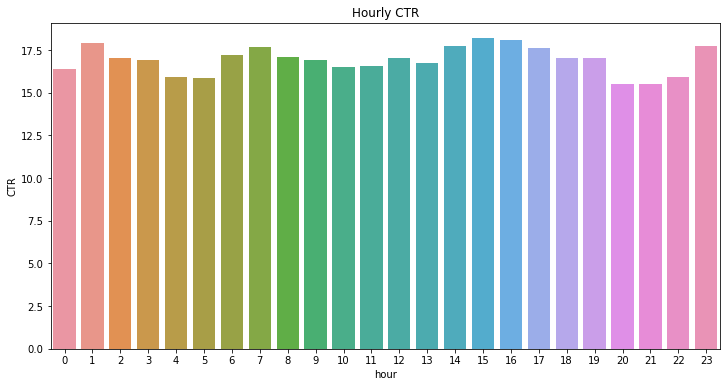

In [17]:
df_click = df[df['y'] == 1]
df_hour = df[['hour','y']].groupby(['hour']).count().reset_index()
df_hour = df_hour.rename(columns={'y': 'impressions'})
df_hour['y'] = df_click[['hour','y']].groupby(['hour']).count().reset_index()['y']
df_hour['CTR'] = df_hour['y']/df_hour['impressions']*100

plt.figure(figsize=(12,6))
sb.barplot(y='CTR', x='hour', data=df_hour)
plt.title('Hourly CTR');

#### One of the interesting observations here is that the highest CTR happened in the hour of mid-night, 1, 7 and 15. If you remember, around mid-night has the least number of impressions and clicks.

### dayofweek

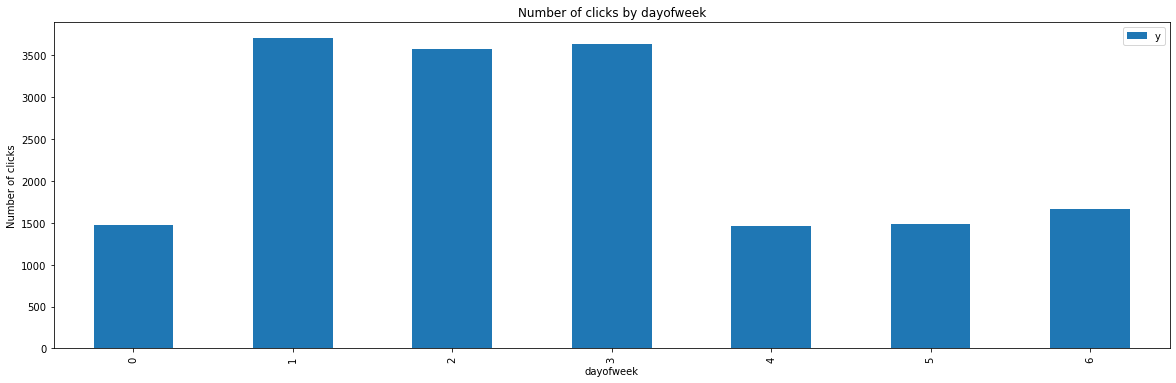

In [18]:
df.groupby('dayofweek').agg({'y':'sum'}).plot(kind='bar', title='Number of clicks by dayofweek', ylabel='Number of clicks',figsize=(20,6))
plt.show()

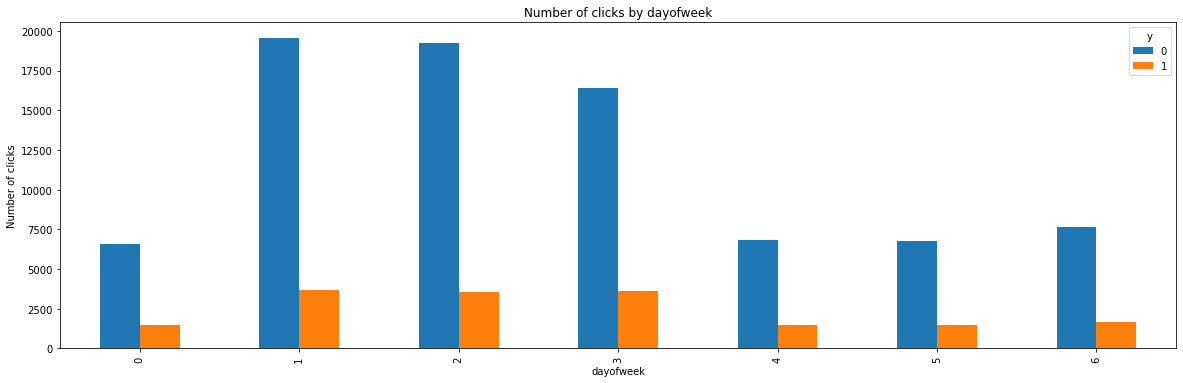

In [19]:
df.groupby(['dayofweek','y']).size().unstack().plot(kind='bar', title='Number of clicks by dayofweek', ylabel='Number of clicks',figsize=(20,6))
plt.show()

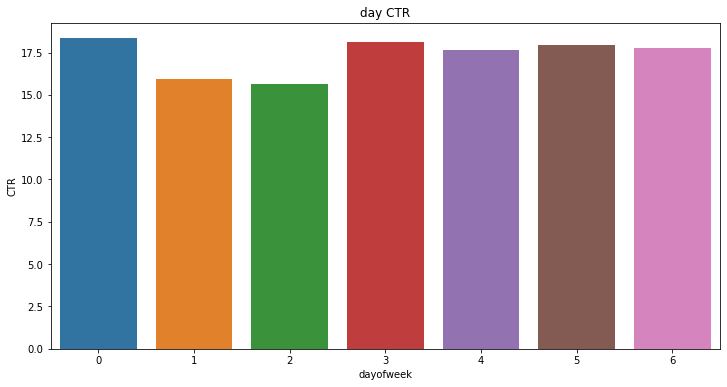

In [20]:
df_day = df[['dayofweek','y']].groupby(['dayofweek']).count().reset_index()
df_day = df_day.rename(columns={'y': 'impressions'})
df_day['y'] = df_click[['dayofweek','y']].groupby(['dayofweek']).count().reset_index()['y']
df_day['CTR'] = df_day['y']/df_day['impressions']*100

plt.figure(figsize=(12,6))
sb.barplot(y='CTR', x='dayofweek', data=df_day)
plt.title('day CTR');

### on 1st,2nd and 3rd days i.e (Tuesday, Wednesday and thursday) have most clicks and 0th,3rd,4th and 5th have high CTR

## C1

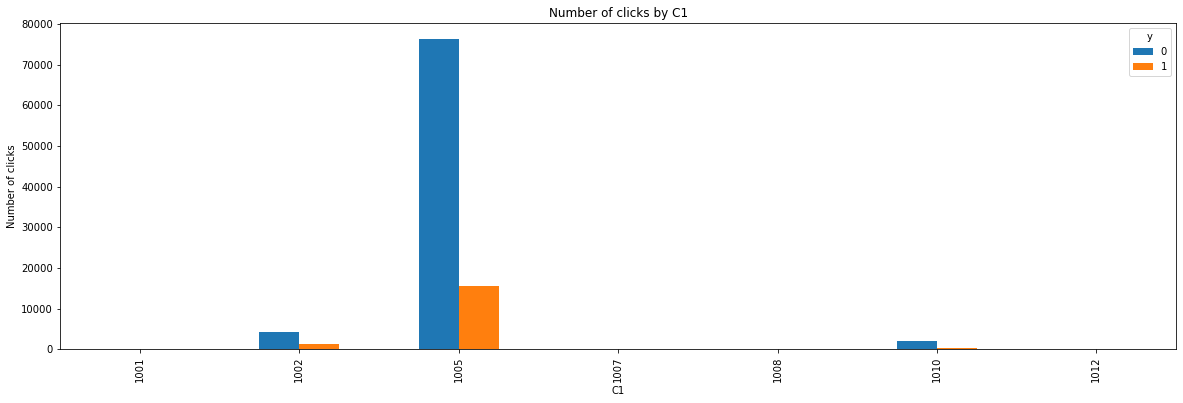

In [21]:
df.groupby(['C1','y']).size().unstack().plot(kind='bar', title='Number of clicks by C1', ylabel='Number of clicks',figsize=(20,6))
plt.show()

### while most of the data shows 1002 & 1005 having clicks most

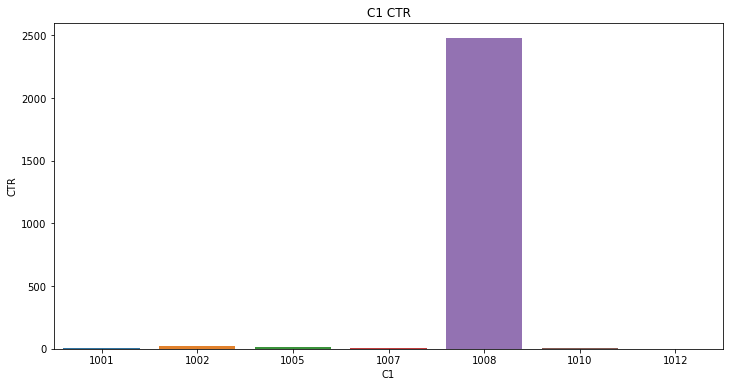

In [22]:
df_C1 = df[['C1','y']].groupby(['C1']).count().reset_index()
df_C1 = df_C1.rename(columns={'y': 'impressions'})
df_C1['y'] = df_click[['C1','y']].groupby(['C1']).count().reset_index()['y']
df_C1['CTR'] = df_C1['y']/df_C1['impressions']*100

plt.figure(figsize=(12,6))
sb.barplot(y='CTR', x='C1', data=df_C1)
plt.title('C1 CTR');

### for 1008 C1 CTR rate is much higher, Hence its an important column

## banner_pos

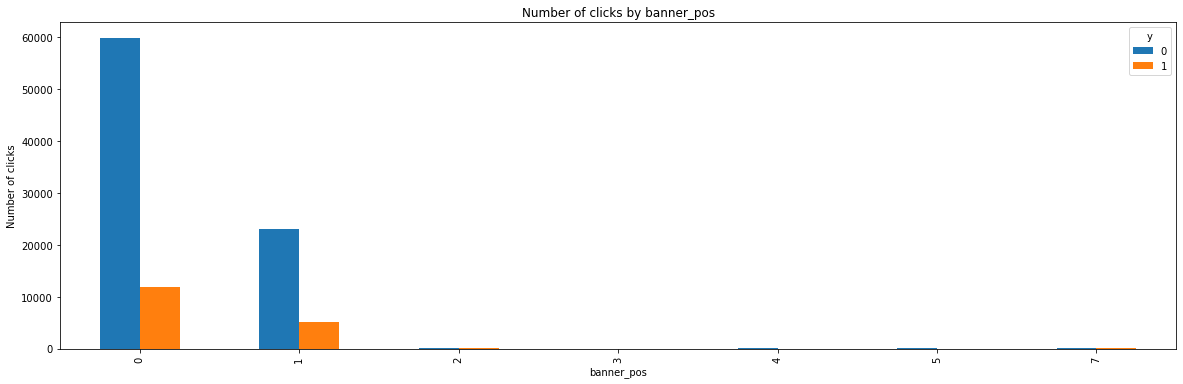

In [23]:
df.groupby(['banner_pos','y']).size().unstack().plot(kind='bar', title='Number of clicks by banner_pos', ylabel='Number of clicks',figsize=(20,6))
plt.show()

### Banner position 0 and 1 have high data captured

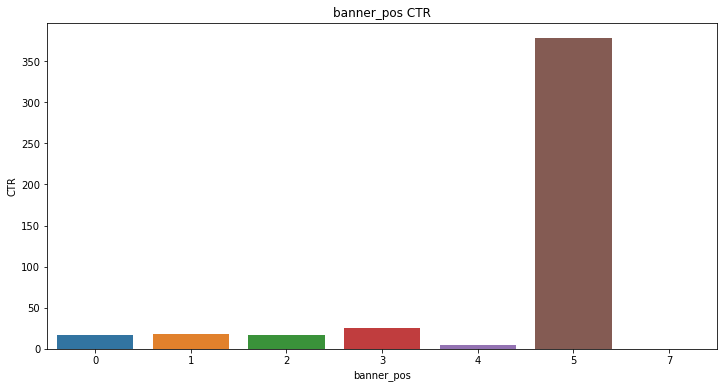

In [24]:
df_banner_pos = df[['banner_pos','y']].groupby(['banner_pos']).count().reset_index()
df_banner_pos = df_banner_pos.rename(columns={'y': 'impressions'})
df_banner_pos['y'] = df_click[['banner_pos','y']].groupby(['banner_pos']).count().reset_index()['y']
df_banner_pos['CTR'] = df_banner_pos['y']/df_banner_pos['impressions']*100

plt.figure(figsize=(12,6))
sb.barplot(y='CTR', x='banner_pos', data=df_banner_pos)
plt.title('banner_pos CTR');

### banner position 5 significantly have higher CTR

## C14 - C21

In [25]:
print("There are {} C14 in the data set".format(df.C14.nunique()))
print("There are {} C15 in the data set".format(df.C15.nunique()))
print("There are {} C16 in the data set".format(df.C16.nunique()))
print("There are {} C17 in the data set".format(df.C17.nunique()))
print("There are {} C18 in the data set".format(df.C18.nunique()))
print("There are {} C19 in the data set".format(df.C19.nunique()))
print("There are {} C20 in the data set".format(df.C20.nunique()))
print("There are {} C21 in the data set".format(df.C21.nunique()))

There are 1722 C14 in the data set
There are 8 C15 in the data set
There are 9 C16 in the data set
There are 399 C17 in the data set
There are 4 C18 in the data set
There are 64 C19 in the data set
There are 154 C20 in the data set
There are 60 C21 in the data set


### While C14 ,C17,C19,C20 & C21 have very high unique category its computationally high to visualize. Hence will only look at C15,C16 and C18

## C15

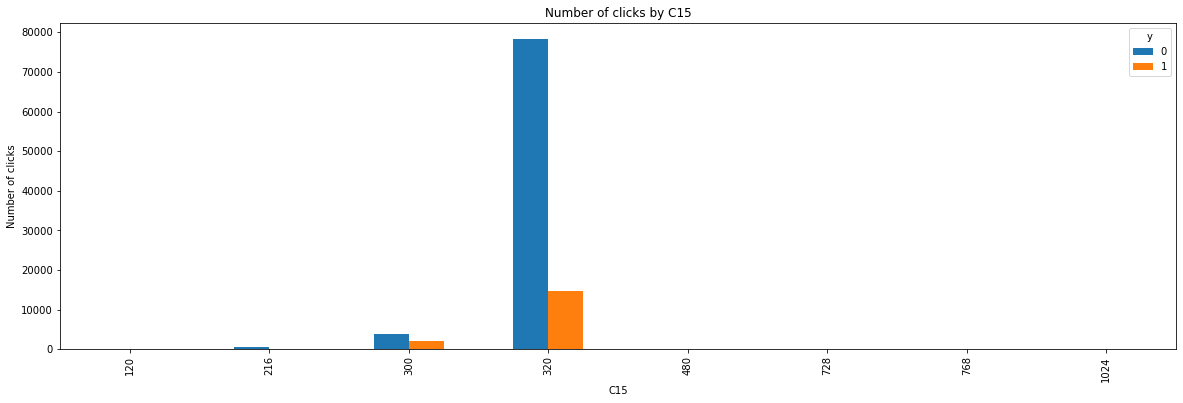

In [26]:
df.groupby(['C15','y']).size().unstack().plot(kind='bar', title='Number of clicks by C15', ylabel='Number of clicks',figsize=(20,6))
plt.show()

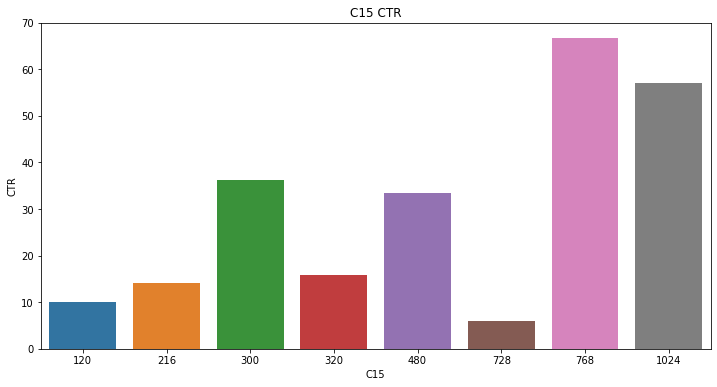

In [27]:
df_C15 = df[['C15','y']].groupby(['C15']).count().reset_index()
df_C15 = df_C15.rename(columns={'y': 'impressions'})
df_C15['y'] = df_click[['C15','y']].groupby(['C15']).count().reset_index()['y']
df_C15['CTR'] = df_C15['y']/df_C15['impressions']*100

plt.figure(figsize=(12,6))
sb.barplot(y='CTR', x='C15', data=df_C15)
plt.title('C15 CTR');

### C15 has most of the click data captured having clicked at 300 & 320
### C15_768 , C15_1024 , C15_480 , C15_300 & C15_320 have good CTR 

## C16

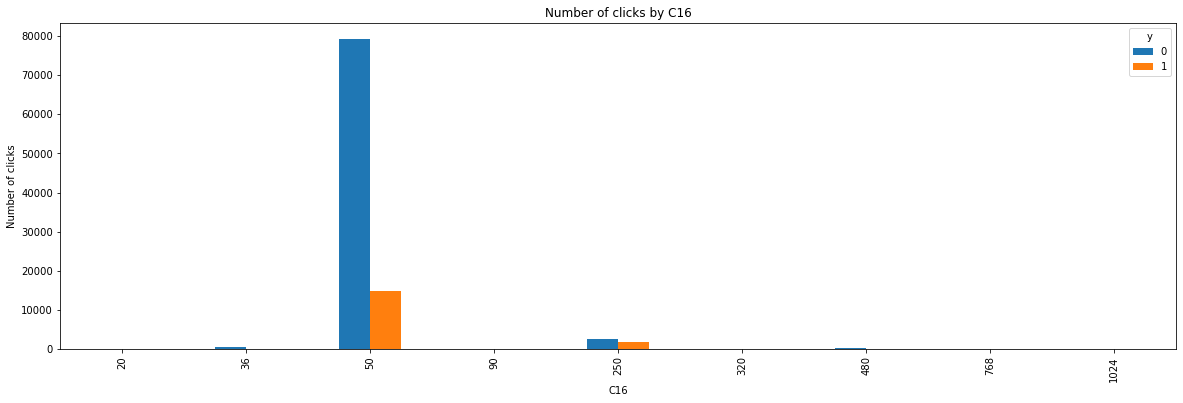

In [28]:
df.groupby(['C16','y']).size().unstack().plot(kind='bar', title='Number of clicks by C16', ylabel='Number of clicks',figsize=(20,6))
plt.show()

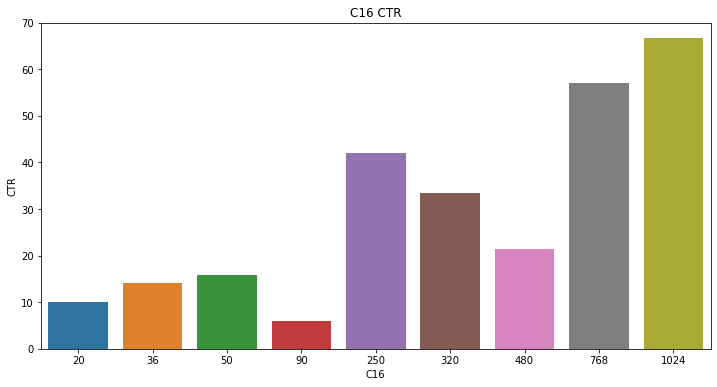

In [29]:
df_C16 = df[['C16','y']].groupby(['C16']).count().reset_index()
df_C16 = df_C16.rename(columns={'y': 'impressions'})
df_C16['y'] = df_click[['C16','y']].groupby(['C16']).count().reset_index()['y']
df_C16['CTR'] = df_C16['y']/df_C16['impressions']*100

plt.figure(figsize=(12,6))
sb.barplot(y='CTR', x='C16', data=df_C16)
plt.title('C16 CTR');

### C16 has most of the click data captured having clicked at 50 & 250
### C16_1024 , C16_768 , C16_320 , C16_480 & C16_250 have high CTR

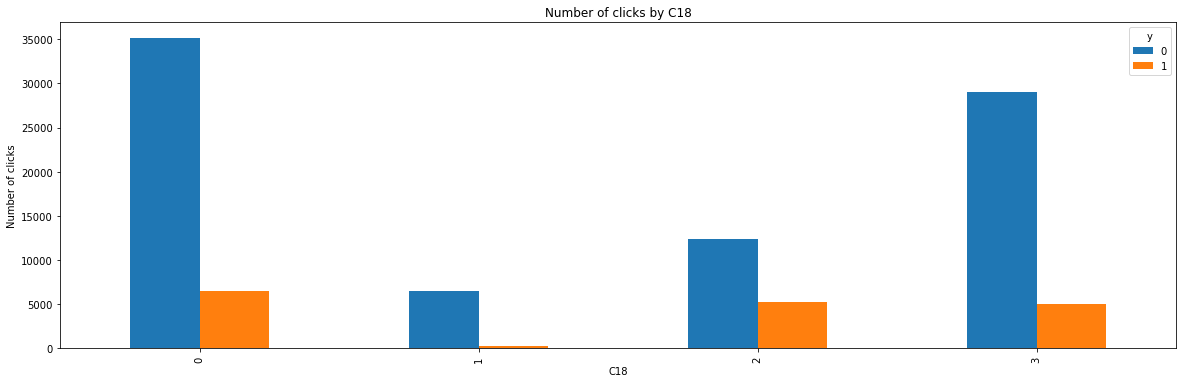

In [30]:
df.groupby(['C18','y']).size().unstack().plot(kind='bar', title='Number of clicks by C18', ylabel='Number of clicks',figsize=(20,6))
plt.show()

## C18

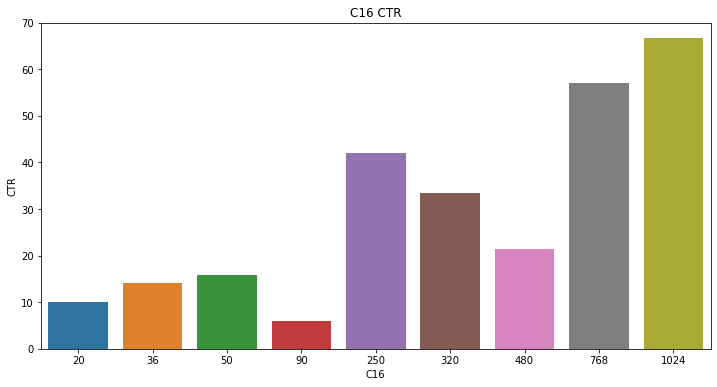

In [31]:
df_C16 = df[['C16','y']].groupby(['C16']).count().reset_index()
df_C16 = df_C16.rename(columns={'y': 'impressions'})
df_C16['y'] = df_click[['C16','y']].groupby(['C16']).count().reset_index()['y']
df_C16['CTR'] = df_C16['y']/df_C16['impressions']*100

plt.figure(figsize=(12,6))
sb.barplot(y='CTR', x='C16', data=df_C16)
plt.title('C16 CTR');

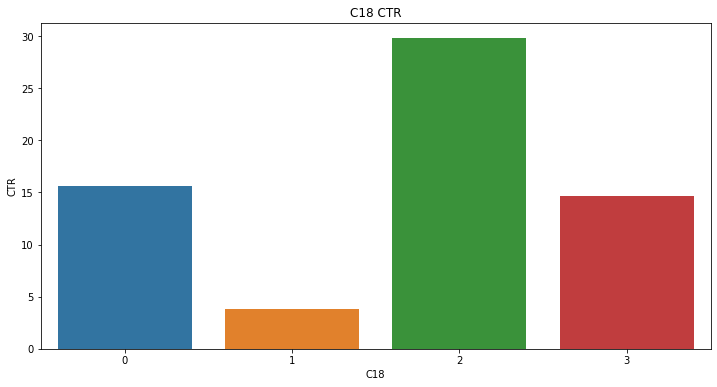

In [32]:
df_C18 = df[['C18','y']].groupby(['C18']).count().reset_index()
df_C18 = df_C18.rename(columns={'y': 'impressions'})
df_C18['y'] = df_click[['C18','y']].groupby(['C18']).count().reset_index()['y']
df_C18['CTR'] = df_C18['y']/df_C18['impressions']*100

plt.figure(figsize=(12,6))
sb.barplot(y='CTR', x='C18', data=df_C18)
plt.title('C18 CTR');

### C18 has most of the click data captured having clicked at 0,2 & 3
### C18_2 has significantely high CTR and C18_0 & C18_3 have a moderate CTR

### Site columns

In [33]:
#unique values 
#pip install PrettyTable
from prettytable import PrettyTable
site_columns = ['site_id', 'site_domain', 'site_category']
t = PrettyTable(['site_Column', 'Unique_values'])
for col in site_columns:
    num = df[col].nunique()
    t.add_row([col, num])
print(t)

+---------------+---------------+
|  site_Column  | Unique_values |
+---------------+---------------+
|    site_id    |      1485     |
|  site_domain  |      1331     |
| site_category |       19      |
+---------------+---------------+


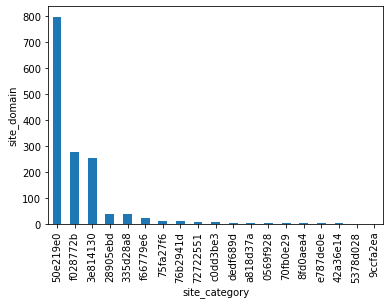

In [34]:
# lets evaluate how much site_category and site_domain are related
site_categoryVSsite_domain = df.groupby('site_category')['site_domain'].nunique()
site_categoryVSsite_domain.sort_values(ascending=False).plot(kind='bar')
plt.ylabel("site_domain")
plt.show()

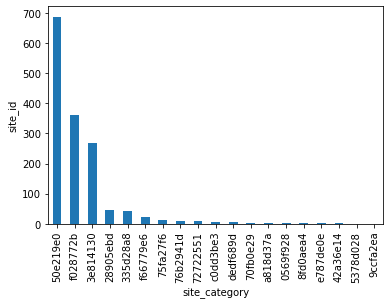

In [35]:
# lets evaluate how much site_category and site_id are related
site_categoryVSsite_id = df.groupby('site_category')['site_id'].nunique()
site_categoryVSsite_id.sort_values(ascending=False).plot(kind='bar')
plt.ylabel("site_id")
plt.show()

### App columns

In [36]:
#unique values 
site_columns = ['app_id', 'app_domain', 'app_category']
t = PrettyTable(['app_Column', 'Unique_values'])
for col in site_columns:
    num = df[col].nunique()
    t.add_row([col, num])
print(t)

+--------------+---------------+
|  app_Column  | Unique_values |
+--------------+---------------+
|    app_id    |      1354     |
|  app_domain  |       96      |
| app_category |       21      |
+--------------+---------------+


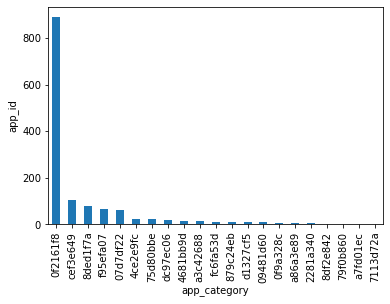

In [37]:
# lets evaluate how much app_category and app_id are related
app_categoryVSapp_id = df.groupby('app_category')['app_id'].nunique()
app_categoryVSapp_id.sort_values(ascending=False).plot(kind='bar')
plt.ylabel("app_id")
plt.show()

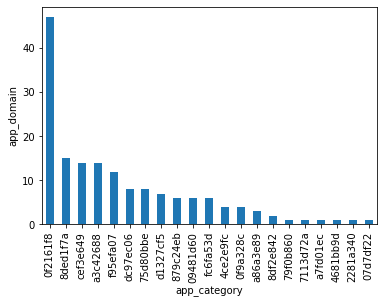

In [38]:
# lets evaluate how much app_category and app_domain are related
app_categoryVSapp_domain = df.groupby('app_category')['app_domain'].nunique()
app_categoryVSapp_domain.sort_values(ascending=False).plot(kind='bar')
plt.ylabel("app_domain")
plt.show()

In [39]:
site_columns = ['device_id', 'device_ip', 'device_model']
t = PrettyTable(['app_Column', 'Unique_values'])
for col in site_columns:
    num = df[col].nunique()
    t.add_row([col, num])
print(t)

+--------------+---------------+
|  app_Column  | Unique_values |
+--------------+---------------+
|  device_id   |     16801     |
|  device_ip   |     78013     |
| device_model |      3145     |
+--------------+---------------+


## Evaluation Results on site columns, App columns Device columns and C14 - C21
> ### Site columns:
>> #### Between 'site_id', 'site_domain' & 'site_category'. 
'site_id' & 'site_domain'  has too many unique value hence while doing one hot encoding this will result in many columns, which in turn will be have computation and complexity, so will drop these columns. on the other hand as we the when these columns we comapred by using group by with 'site_category' column, this resulted in better explaination on well data is categorized. Hence will keep this column (site_category) and do one hot encoding.

> ### App columns:
>> #### Between 'app_id', 'app_domain' & 'app_category'. 
'app_id' & 'app_domain'  has too many unique value hence while doing one hot encoding this will result in many columns, which in turn will be have computation and complexity, so will drop these columns. on the other hand as we the when these columns we comapred by using group by with 'app_category' column, this resulted in better explaination on well data is categorized. Hence will keep this column (app_category) and do one hot encoding. 

> ### Device columns:
>> #### Between 'device_id', 'device_ip', 'device_model'. 
'device_id', 'device_ip', 'device_model' all have too many unique value hence while doing one hot encoding this will result in many columns, which in turn will be having high computation and complexity, so will drop these columns for now.

> ### C14 - C21:
>> #### Between C14 - C21. 
While C14 ,C17,C19,C20 & C21 have very high unique category hence while doing one hot encoding this will result in many columns, which in turn will be having high computation and complexity, so will drop these columns for now.


### This initial feature selections are being done thinking of staring with simple model and then on need basis for improving model or analysis we shall stack the other columns again into the models.

In [40]:
df = pd.get_dummies(df, columns=['banner_pos','device_type','device_conn_type','month','C1','C15','C16','C18','dayofweek','day', 'hour','site_category','app_category'],drop_first=True)

## Removing columns which are not required

In [41]:
# Since will 'site_id', 'site_domain' , 'app_id', 'app_domain' ,'device_id', 'device_ip', 'device_model' & 'click' columns
# Will drop click column, since we already have column 'y' 
df.drop( ['click','C14','C17','C19','C20','C21','site_id', 'site_domain','app_id','app_domain','device_id', 'device_ip','device_model'], axis=1, inplace = True )

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 113 entries, y to app_category_fc6fa53d
dtypes: int64(1), uint8(112)
memory usage: 11.4 MB


## Missing Data check

In [43]:
missing_val = df.isna().sum().sort_values(ascending=False)
print(missing_val)

y                         0
hour_6                    0
site_category_75fa27f6    0
site_category_72722551    0
site_category_70fb0e29    0
site_category_5378d028    0
site_category_50e219e0    0
site_category_42a36e14    0
site_category_3e814130    0
site_category_335d28a8    0
site_category_28905ebd    0
hour_23                   0
hour_22                   0
hour_21                   0
hour_20                   0
hour_19                   0
hour_18                   0
hour_17                   0
hour_16                   0
hour_15                   0
hour_14                   0
hour_13                   0
hour_12                   0
hour_11                   0
hour_10                   0
hour_9                    0
hour_8                    0
site_category_76b2941d    0
site_category_8fd0aea4    0
site_category_9ccfa2ea    0
app_category_75d80bbe     0
app_category_f95efa07     0
app_category_dc97ec06     0
app_category_d1327cf5     0
app_category_cef3e649     0
app_category_a86a3e8

### There no NA or missing data in our Data set

## As we know through that, our target Variable 'y' is an categorical variable, Hence will be performing classification ML Techniques.

## Splitting the data into Training and Test

In [44]:
df.columns

Index(['y', 'banner_pos_1', 'banner_pos_2', 'banner_pos_3', 'banner_pos_4',
       'banner_pos_5', 'banner_pos_7', 'device_type_1', 'device_type_4',
       'device_type_5',
       ...
       'app_category_8ded1f7a', 'app_category_8df2e842',
       'app_category_a3c42688', 'app_category_a7fd01ec',
       'app_category_a86a3e89', 'app_category_cef3e649',
       'app_category_d1327cf5', 'app_category_dc97ec06',
       'app_category_f95efa07', 'app_category_fc6fa53d'],
      dtype='object', length=113)

In [45]:
# Split the data into a training and test set. 

# All columns are features execpt for y
X = df.loc[:,df.columns != 'y']

# y is the target variable
y = df.loc[:,['y']]

In [46]:
#import a prebuilt function to split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(79999, 112)
(79999, 1)
(20000, 112)
(20000, 1)


## As we saw below, our minority class have really less data captured. I am going to use SMOTE technique for adding synthetic data
> ### SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.

## Before SMOTE sampling techique

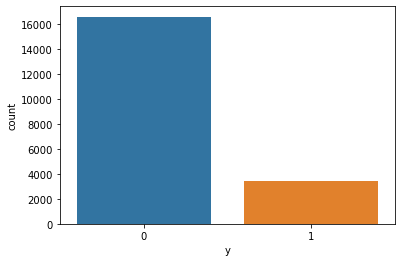

In [48]:
plt.figure()
sb.countplot(x='y', data=y_test)
plt.show()

In [49]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train)
X_test_sm, y_test_sm = sm.fit_sample(X_test, y_test)

In [50]:
print(X_train_sm.shape)
print(y_train_sm.shape)
print(X_test_sm.shape)
print(y_test_sm.shape)

(132830, 112)
(132830, 1)
(33208, 112)
(33208, 1)


## After Smote Sampling Technique

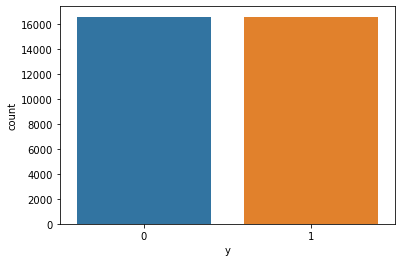

In [52]:
plt.figure()
sb.countplot(x='y', data=y_test_sm)
plt.show()

## Splitting Data for cross validation

In [53]:
#spliting data into validation train and validation test
Xtrain_sm, Xcv_sm, Ytrain_sm, Ycv_sm = train_test_split(X_train_sm, y_train_sm, test_size=0.10, random_state=42)

## KFold parameters for cross Validation

In [54]:
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Model-1
## Logistic Regression using Lasso (L1) regularization technique

In [55]:
# Model Building
model_1=LogisticRegression(penalty='l1',solver='liblinear')
model_1=model_1.fit(Xtrain_sm,Ytrain_sm)
y_pred=model_1.predict(X_test_sm)
lr_probability =model_1.predict_proba(X_test_sm)[:,1]


acc_lr=accuracy_score(y_test_sm,y_pred)
recall_lr=recall_score(y_test_sm,y_pred)
precision_lr=precision_score(y_test_sm,y_pred)
f1score_lr=f1_score(y_test_sm,y_pred)
AUC_LR=roc_auc_score(y_test_sm, model_1.predict_proba(X_test_sm)[:, 1])

#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test_sm,y_pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.7484642254878343
ROC_AUC Score: 0.8359579108510393


In [56]:
# Validation data set accuracy
Ycv_pred = model_1.predict(Xcv_sm)
acc_lr_val = accuracy_score(Ycv_sm, Ycv_pred)
print('Accuracy score for validation dataset is:',acc_lr_val)

Accuracy score for validation dataset is: 0.6707069186177821


In [57]:
lr_cv_acc = cross_val_score(model_1, Xtrain_sm, Ytrain_sm, cv=cv, scoring='accuracy').mean()
print("Cross Validation score for Logistic Regression using Lasso:", lr_cv_acc)

Cross Validation score for Logistic Regression using Lasso: 0.6746384519904947


[[13381  3223]
 [ 5130 11474]]


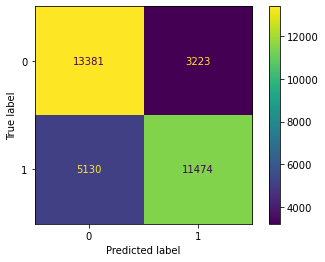

In [58]:
# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test_sm, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(model_1, X_test_sm, y_test_sm)
plt.show()

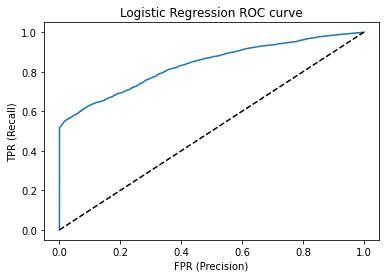

In [59]:
fpr, tpr,_ = roc_curve(y_test_sm, lr_probability,)
plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [60]:
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76     16604
           1       0.78      0.69      0.73     16604

    accuracy                           0.75     33208
   macro avg       0.75      0.75      0.75     33208
weighted avg       0.75      0.75      0.75     33208



# Model_2
## Random Forest Technique

In [61]:
model_2 = RandomForestClassifier(criterion='gini',random_state=42)
model_2=model_2.fit(Xtrain_sm, Ytrain_sm)
y_pred = model_2.predict(X_test_sm)
RF_probability = model_2.predict_proba(X_test_sm)[:,1]


AUC_RF=roc_auc_score(y_test_sm, model_2.predict_proba(X_test_sm)[:, 1])
acc_rf=accuracy_score(y_test_sm,y_pred)
recall_rf=recall_score(y_test_sm,y_pred)
precision_rf=precision_score(y_test_sm,y_pred)
f1score_rf=f1_score(y_test_sm,y_pred)

print(accuracy_score(y_pred,y_test_sm))
print("ROC_AUC Score:",AUC_RF)

0.7346723681040713
ROC_AUC Score: 0.816430764376537


In [62]:
# Validation data set accuracy
Ycv_pred = model_2.predict(Xcv_sm)
acc_rf_val = accuracy_score(Ycv_sm, Ycv_pred)
print('Accuracy score for validation dataset is:',acc_rf_val)

Accuracy score for validation dataset is: 0.7464428216517353


In [63]:
RF_cv_acc = cross_val_score(model_2, Xtrain_sm, Ytrain_sm, cv=cv, scoring='accuracy').mean()
print("Cross Validation score for Random Forest:", RF_cv_acc)

Cross Validation score for Random Forest: 0.7355600573826393


[[11920  4684]
 [ 4127 12477]]


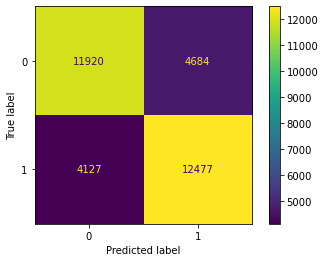

In [64]:
# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test_sm, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(model_2, X_test_sm, y_test_sm)
plt.show()

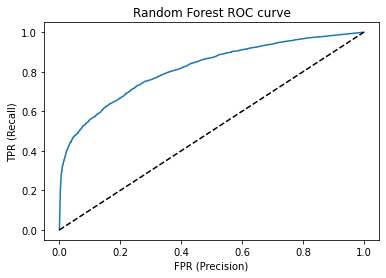

In [65]:
fpr, tpr,_ = roc_curve(y_test_sm, RF_probability,)
plt.title('Random Forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [66]:
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     16604
           1       0.73      0.75      0.74     16604

    accuracy                           0.73     33208
   macro avg       0.73      0.73      0.73     33208
weighted avg       0.73      0.73      0.73     33208



# Model_3
## Boosting Technique (XGBOOST)

### There are 2 most widely used boosting techniques
> ### Adaboost
> ### XGBoost

###  We will be using XGBOOST technique because eventhough we have done some feature selection but still we have not done any extensive feature selection.Also as we know with SMOTE , one of the disadvantage is that it adds up some noise, hence ADABOOST is not that good with noisy data. So we shall be using XGBOOST technique

In [67]:
#Gradient Boosted Trees (GBT)
model_3=XGBClassifier(random_state=42,eval_metric='mlogloss')
model_3=model_3.fit(Xtrain_sm, Ytrain_sm)
y_predict = model_3.predict(X_test_sm)
XGB_probability = model_3.predict_proba(X_test_sm)[:,1]

acc_xgb=accuracy_score(y_test_sm,y_predict)
recall_xgb=recall_score(y_test_sm,y_predict)
precision_xgb=precision_score(y_test_sm,y_predict)
f1score_xgb=f1_score(y_test_sm,y_predict)

AUC_xgb=roc_auc_score(y_test_sm, model_3.predict_proba(X_test_sm)[:, 1])


print(accuracy_score(y_predict,y_test_sm))
print("ROC_AUC Score:",AUC_xgb)

0.769814502529511
ROC_AUC Score: 0.8581761140268522


In [68]:
# Validation data set accuracy
Ycv_pred = model_3.predict(Xcv_sm)
acc_xgb_val = accuracy_score(Ycv_sm, Ycv_pred)
print('Accuracy score for validation dataset is:',acc_xgb_val)

Accuracy score for validation dataset is: 0.6993149137995934


In [69]:
XGB_cv_acc = cross_val_score(model_3, Xtrain_sm, Ytrain_sm, cv=cv, scoring='accuracy').mean()
print("Cross Validation score for Random Forest:", XGB_cv_acc)

Cross Validation score for Random Forest: 0.7037817974919857


[[13219  3385]
 [ 4259 12345]]


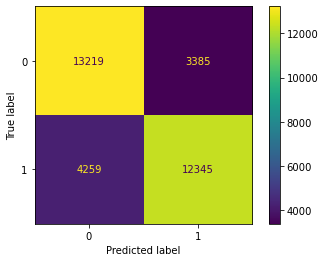

In [70]:
# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test_sm, y_predict)
print(cnf_matrix)
metrics.plot_confusion_matrix(model_3, X_test_sm, y_test_sm)
plt.show()

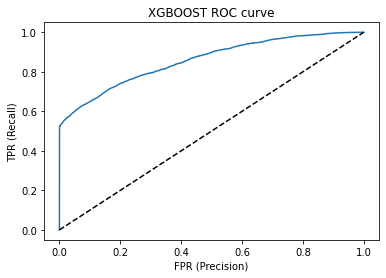

In [71]:
fpr, tpr,_ = roc_curve(y_test_sm, XGB_probability,)
plt.title('XGBOOST ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [72]:
print(classification_report(y_test_sm, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78     16604
           1       0.78      0.74      0.76     16604

    accuracy                           0.77     33208
   macro avg       0.77      0.77      0.77     33208
weighted avg       0.77      0.77      0.77     33208



In [73]:
row_name=['Logistic regression Using Lasso','Random forest','XGBOOST']
columns_data={"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb],"Cross-Validation_Accuracy":[lr_cv_acc,RF_cv_acc,XGB_cv_acc],"Validation_Data_Accuracy":[acc_lr_val,acc_rf_val,acc_xgb_val],"Test_Data_Accuracy":[acc_lr,acc_rf,acc_xgb]}
Result_before_tuning=pd.DataFrame(data=columns_data,index=row_name)
Result_before_tuning

,Recall,Precision,f1_score,ROC_AUC,Cross-Validation_Accuracy,Validation_Data_Accuracy,Test_Data_Accuracy
Logistic regression Using Lasso,0.691038,0.780704,0.733140,0.835958,0.674638,0.670707,0.748464
Random forest,0.751445,0.727056,0.739049,0.816431,0.735560,0.746443,0.734672
XGBOOST,0.743496,0.784806,0.763593,0.858176,0.703782,0.699315,0.769815


## Model Evaluation (With minimum feature selection & No hyperparameter tuning(default hyperparameter) for Algorythms)

> ### As we see that model_1 (Logistic regression Using Lasso) & mode_3 (XGBOOST) have good ROC_AUC but they perform bad in cross_validation and validation_datacompared to model_2.Also model_1 (Logistic regression Using Lasso) Recall value is comparately lower than others Model_2 (Random forest) and mode_3 (XGBOOST).
> ### Where as, Model_2 (Random forest) performs better than all other models, having Cross-validation_Accuracy, Validation_Data_Accuracy and Test_Data_Accuracy being almost same also its Recall value is high compare to all other models
>> ### Recall value is calculated as the ratio between the numbers of Positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect positive samples. The higher the recall, the more positive samples detected.

### We will not make a final decision on model selection here, but rather will do it after doing the following

> ### Hyperparameter Tuning
> ### Feature selection using RFE

## 1. Hyperparamter Tuning Optimization 

### max_depth  

In [74]:
parameters = {'max_depth': range(1,50,5)}

In [75]:
dtree = RandomForestClassifier(criterion='gini', random_state=42)

In [76]:
tree=GridSearchCV(dtree,parameters,cv=cv,scoring="accuracy",return_train_score=True)

In [77]:
tree.fit(Xtrain_sm, Ytrain_sm)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': range(1, 50, 5)}, return_train_score=True,
             scoring='accuracy')

In [78]:
scores = tree.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.516267,0.045834,0.112423,0.001114,1,{'max_depth': 1},0.615098,0.613551,0.613576,0.611318,0.613284,0.613365,0.001207,10,0.614929,0.613528,0.614536,0.612926,0.612926,0.613769,0.000826
1,3.785182,0.019322,0.161425,0.003150,6,{'max_depth': 6},0.657800,0.644500,0.647539,0.657493,0.647497,0.650966,0.005566,9,0.660163,0.647532,0.651070,0.661986,0.647420,0.653634,0.006242
2,6.152089,0.033161,0.222238,0.005077,11,{'max_depth': 11},0.671476,0.670640,0.673763,0.673721,0.676607,0.673242,0.002084,8,0.677332,0.673359,0.676990,0.679207,0.678287,0.677035,0.001995
3,8.534278,0.221366,0.300607,0.015827,16,{'max_depth': 16},0.689837,0.696110,0.693212,0.689615,0.693965,0.692548,0.002494,7,0.698328,0.698924,0.700443,0.698248,0.698300,0.698849,0.000835
4,10.654076,0.027485,0.387804,0.028288,21,{'max_depth': 21},0.704141,0.703848,0.703417,0.701660,0.705299,0.703673,0.001184,6,0.713678,0.711116,0.712991,0.712928,0.713545,0.712851,0.000917
5,13.756665,0.603224,0.486410,0.054690,26,{'max_depth': 26},0.711000,0.714596,0.714334,0.712577,0.713455,0.713192,0.001306,5,0.725650,0.724615,0.725663,0.726594,0.724848,0.725474,0.000700
6,14.976824,0.052063,0.536305,0.017145,31,{'max_depth': 31},0.719197,0.722459,0.722740,0.717847,0.722155,0.720880,0.001981,4,0.735531,0.736451,0.737719,0.737970,0.736590,0.736852,0.000892
7,17.235218,1.208692,0.619628,0.012869,36,{'max_depth': 36},0.725680,0.726558,0.728721,0.724999,0.728596,0.726911,0.001511,3,0.745329,0.745862,0.749043,0.747987,0.748301,0.747304,0.001447
8,17.578643,0.128635,0.654948,0.003665,41,{'max_depth': 41},0.731995,0.731870,0.731356,0.728010,0.731607,0.730968,0.001495,2,0.755398,0.755712,0.756613,0.756237,0.756582,0.756108,0.000481
9,18.631850,0.078802,0.706326,0.007806,46,{'max_depth': 46},0.735341,0.734170,0.734201,0.731440,0.733239,0.733678,0.001302,1,0.763073,0.762926,0.763609,0.763253,0.764278,0.763428,0.000482


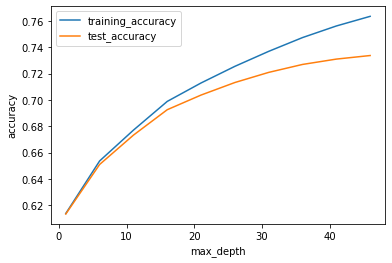

In [79]:
# Plot accuracy vs param_max_depth
plt.figure
plt.plot(scores["param_max_depth"].data,scores["mean_train_score"],label="training_accuracy")
plt.plot(scores["param_max_depth"].data, scores["mean_test_score"], label="test_accuracy")
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [80]:
tree.best_params_

{'max_depth': 46}

## max_depth = 46 looks a good parameter by looking at the above visual

## min_sample_leaf

In [81]:
parameters_min_leaf = {'min_samples_leaf': range(10,300,20)}

In [82]:
tree2= GridSearchCV(dtree, parameters_min_leaf, cv=cv, scoring="accuracy",return_train_score=True)

In [83]:
tree2.fit(Xtrain_sm, Ytrain_sm)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'min_samples_leaf': range(10, 300, 20)},
             return_train_score=True, scoring='accuracy')

In [84]:
scores2 = tree2.cv_results_
pd.DataFrame(scores2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,15.764989,0.139851,0.630215,0.112407,10,{'min_samples_leaf': 10},0.717650,0.716102,0.717638,0.715212,0.716341,0.716588,0.000940,1,0.729749,0.730523,0.731487,0.731132,0.731404,0.730859,0.000650
1,12.766552,0.171785,0.472389,0.041704,30,{'min_samples_leaf': 30},0.695943,0.691844,0.692626,0.688695,0.693797,0.692581,0.002385,2,0.701402,0.698213,0.702660,0.701876,0.700830,0.700996,0.001515
2,11.198891,0.163481,0.395906,0.007312,50,{'min_samples_leaf': 50},0.679256,0.677206,0.677904,0.674014,0.678447,0.677365,0.001805,3,0.683480,0.682801,0.682574,0.683525,0.683170,0.683110,0.000373
3,10.447349,0.610543,0.381820,0.037776,70,{'min_samples_leaf': 70},0.665830,0.663237,0.665733,0.660839,0.666820,0.664492,0.002176,4,0.668653,0.668434,0.668991,0.667820,0.669431,0.668666,0.000540
4,9.503365,0.119236,0.337671,0.006221,90,{'min_samples_leaf': 90},0.660435,0.656253,0.659835,0.654523,0.662428,0.658695,0.002886,5,0.663007,0.660801,0.662592,0.660815,0.662760,0.661995,0.000978
5,8.908951,0.026235,0.344718,0.041559,110,{'min_samples_leaf': 110},0.655207,0.653869,0.652976,0.650508,0.656824,0.653877,0.002127,6,0.656325,0.657371,0.655419,0.656245,0.656685,0.656409,0.000635
6,8.389839,0.156403,0.306531,0.005393,130,{'min_samples_leaf': 130},0.649603,0.650272,0.650048,0.645573,0.648250,0.648749,0.001736,7,0.650773,0.653408,0.650766,0.650850,0.650296,0.651219,0.001112
7,10.755820,4.721977,0.379235,0.115776,150,{'min_samples_leaf': 150},0.644584,0.643831,0.646493,0.640177,0.645029,0.644023,0.002110,8,0.646518,0.647333,0.646396,0.645706,0.647274,0.646645,0.000605
8,8.716908,0.900484,0.341338,0.032764,170,{'min_samples_leaf': 170},0.645588,0.641991,0.643147,0.638923,0.642101,0.642350,0.002147,9,0.645650,0.643893,0.643468,0.643510,0.643311,0.643966,0.000863
9,7.830155,0.855780,0.301576,0.052824,190,{'min_samples_leaf': 190},0.642535,0.640234,0.640847,0.638797,0.641265,0.640735,0.001228,10,0.643443,0.642325,0.640917,0.642747,0.641638,0.642214,0.000874


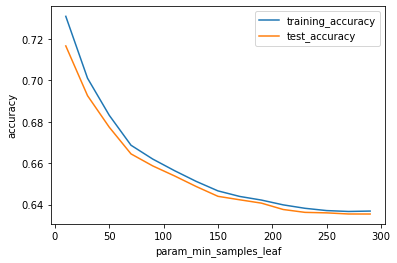

In [85]:
# Plot accuracy vs param_min_samples_leaf
plt.figure
plt.plot(scores2["param_min_samples_leaf"].data,scores2["mean_train_score"],label="training_accuracy")
plt.plot(scores2["param_min_samples_leaf"].data, scores2["mean_test_score"], label="test_accuracy")
plt.xlabel("param_min_samples_leaf")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [86]:
tree2.best_estimator_

RandomForestClassifier(min_samples_leaf=10, random_state=42)

## At low min_sample_leaf value, the tree will be huge, i.e., it will cover each data point. This will lead to the training accuracy of 100% but test accuracy of almost 0%.

## With an increase in the min_sample_leaf value, the test accuracy increases, as overfitting decreases and the model becomes less complex.

## We will select min_samples_leaf = 10

# 2. Feature selection using RFECV

> ### Using RFECV, which uses K-fold, sklearn.feature_selection.RFE simply trains an estimator that assigns weights to features. It takes out the feature importance based on that estimator and recursively prunes it. Recursive feature elimination with cross-validation on the other hand, add Cross-validation into the mix.

> ### Also, this approach is good for highly imbalance datasets because it uses stratified CV (cross Validation) by default, from sklearn’s.

In [87]:
lm = RandomForestClassifier(max_depth=46,min_samples_leaf=10,random_state=42)
lm.fit(Xtrain_sm,Ytrain_sm)
rfe = RFECV(estimator=lm, step=5, cv=5,min_features_to_select=40)
rfe = rfe.fit(Xtrain_sm, Ytrain_sm)

#### The above RFE takes approx 20 min. Please wait :)

In [88]:
Xtrain_sm.columns[rfe.support_].shape

(62,)

### 62 columns were selected by RFECV from 112

In [89]:
Xtrain_sm.columns[rfe.support_]

Index(['banner_pos_1', 'device_type_1', 'device_conn_type_2',
       'device_conn_type_3', 'C1_1002', 'C1_1005', 'C15_300', 'C15_320',
       'C16_50', 'C16_250', 'C18_1', 'C18_2', 'C18_3', 'dayofweek_1',
       'dayofweek_2', 'dayofweek_3', 'dayofweek_4', 'dayofweek_5',
       'dayofweek_6', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_30', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'site_category_28905ebd', 'site_category_335d28a8',
       'site_category_3e814130', 'site_category_50e219e0',
       'site_category_75fa27f6', 'site_category_f028772b',
       'site_category_f66779e6', 'app_category_0f2161f8',
       'app_category_8ded1f7a', 'app_category_cef3e649',
       'app_category_f95efa07'],
      dtype='object

In [90]:
Xtrain_sm =Xtrain_sm.loc[:,['banner_pos_1', 'device_type_1', 'device_conn_type_2',
       'device_conn_type_3', 'C1_1002', 'C1_1005', 'C15_300', 'C15_320',
       'C16_50', 'C16_250', 'C18_1', 'C18_2', 'C18_3', 'dayofweek_1',
       'dayofweek_2', 'dayofweek_3', 'dayofweek_4', 'dayofweek_5',
       'dayofweek_6', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26',
       'day_27', 'day_28', 'day_29', 'day_30', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23', 'site_category_28905ebd', 'site_category_335d28a8',
       'site_category_3e814130', 'site_category_50e219e0',
       'site_category_75fa27f6', 'site_category_f028772b',
       'site_category_f66779e6', 'app_category_0f2161f8',
       'app_category_8ded1f7a', 'app_category_cef3e649',
       'app_category_f95efa07']]

In [91]:
print(Xtrain_sm.shape)

(119547, 62)


### Function to capture VIF and build model

In [92]:
import statsmodels.api as sm
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [93]:
X_train_new = build_model(Xtrain_sm,Ytrain_sm)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     264.2
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        12:12:58   Log-Likelihood:                -79437.
No. Observations:              119547   AIC:                         1.590e+05
Df Residuals:                  119487   BIC:                         1.596e+05
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

## P-Val for dayofweek_3 is high, Hence we will drop

In [94]:
X_train_new = X_train_new.drop(["dayofweek_3"], axis = 1)

In [95]:
X_train_new = build_model(X_train_new,Ytrain_sm)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     268.7
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        12:12:59   Log-Likelihood:                -79438.
No. Observations:              119547   AIC:                         1.590e+05
Df Residuals:                  119488   BIC:                         1.596e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
checkVIF(X_train_new)

,Features,VIF
21,day_24,6.622941e+12
18,dayofweek_6,1.760938e+12
17,dayofweek_5,1.325953e+12
22,day_25,3.054634e+11
16,dayofweek_4,2.936045e+11
23,day_26,1.888143e+11
0,const,5.436000e+01
6,C1_1005,3.620000e+00
5,C1_1002,3.590000e+00
15,dayofweek_2,1.400000e+00


## both dayofweek_4 and day_24 have same & high P-val but among both VIF is higher for day_24, Hence we will drop day_24

In [97]:
X_train_new = X_train_new.drop(["day_24"], axis = 1)

In [98]:
X_train_new = build_model(X_train_new,Ytrain_sm)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     268.7
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        12:13:52   Log-Likelihood:                -79438.
No. Observations:              119547   AIC:                         1.590e+05
Df Residuals:                  119488   BIC:                         1.596e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [99]:
checkVIF(X_train_new)

,Features,VIF
17,dayofweek_5,inf
21,day_25,1.191428e+13
18,dayofweek_6,2.589764e+12
22,day_26,4.458127e+11
0,const,5.436000e+01
6,C1_1005,3.620000e+00
5,C1_1002,3.590000e+00
15,dayofweek_2,1.400000e+00
53,site_category_50e219e0,1.380000e+00
57,app_category_0f2161f8,1.360000e+00


## both dayofweek_6 and day_26 have same & high P-val but among both VIF is higher for dayofweek_6, Hence we will drop dayofweek_6

In [100]:
X_train_new = X_train_new.drop(["dayofweek_6"], axis = 1)

In [101]:
X_train_new = build_model(X_train_new,Ytrain_sm)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     268.7
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        12:14:50   Log-Likelihood:                -79437.
No. Observations:              119547   AIC:                         1.590e+05
Df Residuals:                  119488   BIC:                         1.596e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [102]:
checkVIF(X_train_new)

,Features,VIF
20,day_25,inf
17,dayofweek_5,inf
0,const,54.36
6,C1_1005,3.62
5,C1_1002,3.59
15,dayofweek_2,1.40
52,site_category_50e219e0,1.38
9,C16_50,1.36
56,app_category_0f2161f8,1.36
8,C15_320,1.33


## both dayofweek_5 and day_25 have same & high P-val also both VIF is infinity ( perfect correlation ) but dayofweek_5 have high CTR rate, hence we will drop day_25

In [103]:
X_train_new = X_train_new.drop(["day_25"], axis = 1)

In [104]:
X_train_new = build_model(X_train_new,Ytrain_sm)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     268.8
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        12:15:39   Log-Likelihood:                -79437.
No. Observations:              119547   AIC:                         1.590e+05
Df Residuals:                  119488   BIC:                         1.596e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [105]:
checkVIF(X_train_new)

,Features,VIF
0,const,54.36
6,C1_1005,3.62
5,C1_1002,3.59
15,dayofweek_2,1.40
51,site_category_50e219e0,1.38
9,C16_50,1.36
55,app_category_0f2161f8,1.36
8,C15_320,1.33
23,day_29,1.33
2,device_type_1,1.07


## Still C1_1005 have high VIF compared to average other features.We will drop it C1_1005

In [106]:
X_train_new = X_train_new.drop(["C1_1005"], axis = 1)

In [107]:
X_train_new = build_model(X_train_new,Ytrain_sm)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     264.6
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        12:16:24   Log-Likelihood:                -79660.
No. Observations:              119547   AIC:                         1.594e+05
Df Residuals:                  119489   BIC:                         1.600e+05
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

## P-value for C15_320 is high, Hence we will drop "C15_320"

In [108]:
X_train_new = X_train_new.drop(["C15_320"], axis = 1)

In [109]:
X_train_new = build_model(X_train_new,Ytrain_sm)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     269.3
Date:                Tue, 24 May 2022   Prob (F-statistic):               0.00
Time:                        12:16:25   Log-Likelihood:                -79661.
No. Observations:              119547   AIC:                         1.594e+05
Df Residuals:                  119490   BIC:                         1.600e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [110]:
checkVIF(X_train_new)

,Features,VIF
0,const,9.16
13,dayofweek_2,1.40
49,site_category_50e219e0,1.38
53,app_category_0f2161f8,1.36
21,day_29,1.33
5,C1_1002,1.09
16,day_22,1.07
2,device_type_1,1.06
8,C16_250,1.05
6,C15_300,1.04


In [111]:
X_train_new = X_train_new.drop(["const"], axis = 1)

## Now for all features both P-values and VIF's look good. Lets proceed with model building by applying these features

In [112]:
X_train_new.shape

(119547, 56)

In [113]:
X_train_new.columns

Index(['banner_pos_1', 'device_type_1', 'device_conn_type_2',
       'device_conn_type_3', 'C1_1002', 'C15_300', 'C16_50', 'C16_250',
       'C18_1', 'C18_2', 'C18_3', 'dayofweek_1', 'dayofweek_2', 'dayofweek_4',
       'dayofweek_5', 'day_22', 'day_23', 'day_26', 'day_27', 'day_28',
       'day_29', 'day_30', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'site_category_28905ebd', 'site_category_335d28a8',
       'site_category_3e814130', 'site_category_50e219e0',
       'site_category_75fa27f6', 'site_category_f028772b',
       'site_category_f66779e6', 'app_category_0f2161f8',
       'app_category_8ded1f7a', 'app_category_cef3e649',
       'app_category_f95efa07'],
      dtype='object')

## Post RFECV and then performing P-val and VIF analysis, to select best features we have 56 features selected.

### Preparation X_train_final , Xcv_final and X_test_final

In [114]:
X_train_final = X_train_new.copy(deep=True)
X_train_final.shape

(119547, 56)

In [115]:
Xcv_final = Xcv_sm.loc[:,['banner_pos_1', 'device_type_1', 'device_conn_type_2',
       'device_conn_type_3', 'C1_1002', 'C15_300', 'C16_50', 'C16_250',
       'C18_1', 'C18_2', 'C18_3', 'dayofweek_1', 'dayofweek_2', 'dayofweek_4',
       'dayofweek_5', 'day_22', 'day_23', 'day_26', 'day_27', 'day_28',
       'day_29', 'day_30', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'site_category_28905ebd', 'site_category_335d28a8',
       'site_category_3e814130', 'site_category_50e219e0',
       'site_category_75fa27f6', 'site_category_f028772b',
       'site_category_f66779e6', 'app_category_0f2161f8',
       'app_category_8ded1f7a', 'app_category_cef3e649',
       'app_category_f95efa07']]
Xcv_final.shape

(13283, 56)

In [116]:
X_test_final = X_test_sm.loc[:,['banner_pos_1', 'device_type_1', 'device_conn_type_2',
       'device_conn_type_3', 'C1_1002', 'C15_300', 'C16_50', 'C16_250',
       'C18_1', 'C18_2', 'C18_3', 'dayofweek_1', 'dayofweek_2', 'dayofweek_4',
       'dayofweek_5', 'day_22', 'day_23', 'day_26', 'day_27', 'day_28',
       'day_29', 'day_30', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'site_category_28905ebd', 'site_category_335d28a8',
       'site_category_3e814130', 'site_category_50e219e0',
       'site_category_75fa27f6', 'site_category_f028772b',
       'site_category_f66779e6', 'app_category_0f2161f8',
       'app_category_8ded1f7a', 'app_category_cef3e649',
       'app_category_f95efa07']]
X_test_final.shape

(33208, 56)

## Final Datasets

In [117]:
# Final Train Dataset
print(X_train_final.shape)
print(Ytrain_sm.shape)

(119547, 56)
(119547, 1)


In [118]:
# Final validation Dataset
print(Xcv_final.shape)
print(Ycv_sm.shape)

(13283, 56)
(13283, 1)


In [119]:
# Final Test Dataset
print(X_test_final.shape)
print(y_test_sm.shape)

(33208, 56)
(33208, 1)


# Re-Building the Models using the calculated Hyperparameters and Features selected using RFECV techniques

> ### Hyperparameters 
>> #### max_depth = 46
>> #### min_samples_leaf=10

# Model_1 : LogisticRegression using Lasso

In [120]:
# Model Building
LR_model=LogisticRegression(penalty='l1',solver='liblinear',random_state=42)
LR_model=LR_model.fit(X_train_final,Ytrain_sm)
y_pred=LR_model.predict(X_test_final)
lr_probability =LR_model.predict_proba(X_test_final)[:,1]


acc_lr_final=accuracy_score(y_test_sm,y_pred)
recall_lr_final=recall_score(y_test_sm,y_pred)
precision_lr_final=precision_score(y_test_sm,y_pred)
f1score_lr_final=f1_score(y_test_sm,y_pred)
AUC_LR_final=roc_auc_score(y_test_sm, LR_model.predict_proba(X_test_final)[:, 1])

#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test_sm,y_pred))
print("ROC_AUC Score:",AUC_LR_final)

Accuracy :  0.746055167429535
ROC_AUC Score: 0.8318527476610054


In [121]:
# Validation data set accuracy
Ycv_pred = LR_model.predict(Xcv_final)
acc_lr_val_final = accuracy_score(Ycv_sm, Ycv_pred)
print('Accuracy score for validation dataset is:',acc_lr_val_final)

Accuracy score for validation dataset is: 0.6677708349017542


In [122]:
lr_cv_acc_final = cross_val_score(LR_model, X_train_final, Ytrain_sm, cv=cv, scoring='accuracy').mean()
print("Cross Validation score for Logistic Regression using Lasso:", lr_cv_acc_final)

Cross Validation score for Logistic Regression using Lasso: 0.6726977832912711


[[13352  3252]
 [ 5181 11423]]


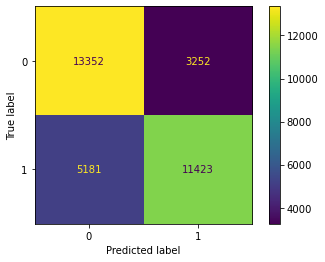

In [123]:
# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test_sm, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(LR_model, X_test_final, y_test_sm)
plt.show()

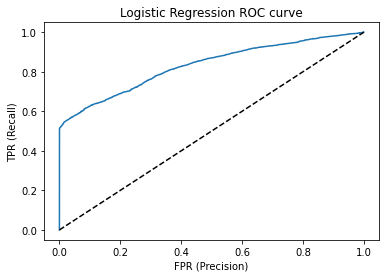

In [124]:
fpr, tpr,_ = roc_curve(y_test_sm, lr_probability,)
plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [125]:
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76     16604
           1       0.78      0.69      0.73     16604

    accuracy                           0.75     33208
   macro avg       0.75      0.75      0.75     33208
weighted avg       0.75      0.75      0.75     33208



# Model_2: Random Forest

In [126]:
RF_model = RandomForestClassifier(criterion='gini',random_state=42,max_depth=46,min_samples_leaf=10)
RF_model=RF_model.fit(X_train_final, Ytrain_sm)
y_pred = RF_model.predict(X_test_final)
RF_probability = RF_model.predict_proba(X_test_final)[:,1]


AUC_RF_final=roc_auc_score(y_test_sm, RF_model.predict_proba(X_test_final)[:, 1])
acc_rf_final=accuracy_score(y_test_sm,y_pred)
recall_rf_final=recall_score(y_test_sm,y_pred)
precision_rf_final=precision_score(y_test_sm,y_pred)
f1score_rf_final=f1_score(y_test_sm,y_pred)

print(accuracy_score(y_pred,y_test_sm))
print("ROC_AUC Score:",AUC_RF_final)

0.7469585642013973
ROC_AUC Score: 0.8322168775699981


In [127]:
# Validation data set accuracy
Ycv_pred = RF_model.predict(Xcv_final)
acc_rf_val_final = accuracy_score(Ycv_sm, Ycv_pred)
print('Accuracy score for validation dataset is:',acc_rf_val_final)

Accuracy score for validation dataset is: 0.7173078370849959


In [128]:
RF_cv_acc_final = cross_val_score(RF_model, X_train_final, Ytrain_sm, cv=cv, scoring='accuracy').mean()
print("Cross Validation score for Random Forest:", RF_cv_acc_final)

Cross Validation score for Random Forest: 0.7172325417129941


[[12516  4088]
 [ 4315 12289]]


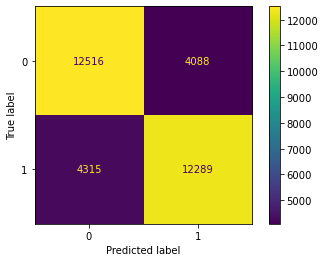

In [129]:
# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test_sm, y_pred)
print(cnf_matrix)
metrics.plot_confusion_matrix(RF_model, X_test_final, y_test_sm)
plt.show()

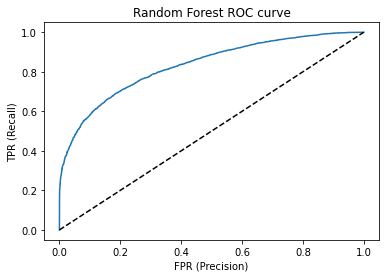

In [130]:
fpr, tpr,_ = roc_curve(y_test_sm, RF_probability,)
plt.title('Random Forest ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [131]:
print(classification_report(y_test_sm, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75     16604
           1       0.75      0.74      0.75     16604

    accuracy                           0.75     33208
   macro avg       0.75      0.75      0.75     33208
weighted avg       0.75      0.75      0.75     33208



# Model_3: XGBOOST

In [132]:
#Gradient Boosted Trees (GBT)
XGB_model=XGBClassifier(random_state=42,eval_metric='mlogloss')
XGB_model=XGB_model.fit(X_train_final, Ytrain_sm)
y_predict = XGB_model.predict(X_test_final)
XGB_probability = XGB_model.predict_proba(X_test_final)[:,1]

acc_xgb_final=accuracy_score(y_test_sm,y_predict)
recall_xgb_final=recall_score(y_test_sm,y_predict)
precision_xgb_final=precision_score(y_test_sm,y_predict)
f1score_xgb_final=f1_score(y_test_sm,y_predict)

AUC_xgb_final=roc_auc_score(y_test_sm, XGB_model.predict_proba(X_test_final)[:, 1])


print(accuracy_score(y_predict,y_test_sm))
print("ROC_AUC Score:",AUC_xgb_final)

0.7674054444712117
ROC_AUC Score: 0.8563743151725796


In [133]:
# Validation data set accuracy
Ycv_pred = XGB_model.predict(Xcv_final)
acc_xgb_val_final = accuracy_score(Ycv_sm, Ycv_pred)
print('Accuracy score for validation dataset is:',acc_xgb_val_final)

Accuracy score for validation dataset is: 0.6978845140405029


In [134]:
XGB_cv_acc_final = cross_val_score(XGB_model, X_train_final, Ytrain_sm, cv=cv, scoring='accuracy').mean()
print("Cross Validation score for Random Forest:", XGB_cv_acc_final)

Cross Validation score for Random Forest: 0.7013726936437982


[[13131  3473]
 [ 4251 12353]]


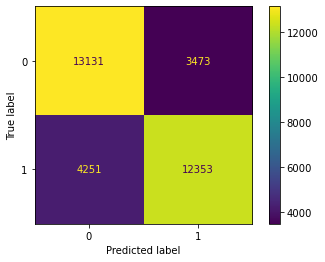

In [135]:
# Plot and print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test_sm, y_predict)
print(cnf_matrix)
metrics.plot_confusion_matrix(XGB_model, X_test_final, y_test_sm)
plt.show()

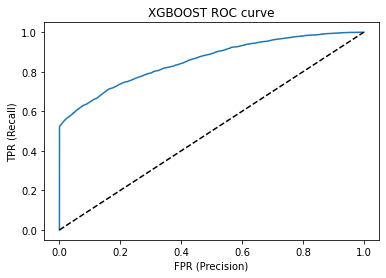

In [136]:
fpr, tpr,_ = roc_curve(y_test_sm, XGB_probability,)
plt.title('XGBOOST ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

In [137]:
print(classification_report(y_test_sm, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77     16604
           1       0.78      0.74      0.76     16604

    accuracy                           0.77     33208
   macro avg       0.77      0.77      0.77     33208
weighted avg       0.77      0.77      0.77     33208



In [138]:
row_name=['Logistic regression Using Lasso','Random forest','XGBOOST']
columns_data={"Recall":[recall_lr_final,recall_rf_final,recall_xgb_final],"Precision":[precision_lr_final,precision_rf_final,precision_xgb_final],
    'f1_score':[f1score_lr_final,f1score_rf_final,f1score_xgb_final],"ROC_AUC":[AUC_LR_final,AUC_RF_final,AUC_xgb_final],"Cross-Validation_Accuracy":[lr_cv_acc_final,RF_cv_acc_final,XGB_cv_acc_final],"Validation_Data_Accuracy":[acc_lr_val_final,acc_rf_val_final,acc_xgb_val_final],"Test_Data_Accuracy":[acc_lr_final,acc_rf_final,acc_xgb_final]}
Result_after_RFECVtuning=pd.DataFrame(data=columns_data,index=row_name)
Result_after_RFECVtuning

,Recall,Precision,f1_score,ROC_AUC,Cross-Validation_Accuracy,Validation_Data_Accuracy,Test_Data_Accuracy
Logistic regression Using Lasso,0.687967,0.778399,0.730394,0.831853,0.672698,0.667771,0.746055
Random forest,0.740123,0.750382,0.745217,0.832217,0.717233,0.717308,0.746959
XGBOOST,0.743977,0.780551,0.761825,0.856374,0.701373,0.697885,0.767405


## Results without Feature selection(RFECV) & Hypertuning

In [139]:
Result_before_tuning

,Recall,Precision,f1_score,ROC_AUC,Cross-Validation_Accuracy,Validation_Data_Accuracy,Test_Data_Accuracy
Logistic regression Using Lasso,0.691038,0.780704,0.733140,0.835958,0.674638,0.670707,0.748464
Random forest,0.751445,0.727056,0.739049,0.816431,0.735560,0.746443,0.734672
XGBOOST,0.743496,0.784806,0.763593,0.858176,0.703782,0.699315,0.769815


## Results with Feature selection(RFECV) & Hypertuning

In [140]:
Result_after_RFECVtuning

,Recall,Precision,f1_score,ROC_AUC,Cross-Validation_Accuracy,Validation_Data_Accuracy,Test_Data_Accuracy
Logistic regression Using Lasso,0.687967,0.778399,0.730394,0.831853,0.672698,0.667771,0.746055
Random forest,0.740123,0.750382,0.745217,0.832217,0.717233,0.717308,0.746959
XGBOOST,0.743977,0.780551,0.761825,0.856374,0.701373,0.697885,0.767405


# Model_selection and Conclusion

### Summary:
> ### 1. Logistic regression Using Lasso model, neither have improved much nor has good recall value & accuracies comapred to how other model/algorithms have performed. Hence Logistic regression Using Lasso is not recommended for Click Through Rate Prediction business analysis.

> ### 2. Between Random forest & XGBOOST models,
>> ### a. For Random forest - recall value, cross_validation_accuracy, validation dataset accuracy decreaded by 1% - 2 %, which is significantely small and also on the other hand ROC_AUC, f1_score, Precision & Test_dataset_accuracy increased by 1% - 2 %. Hence not much of a change
>> ### b. for XGBOOST - All metric have remained same even after Feature selection(RFECV) & Hypertuning, also to note it has the highest ROC_AUC, Recall, Precision and Test_data_accuracy. 

## Model_Selected: XGBOOST

> ## Reasons:

>> 1. Out of all 3 algorithms(models), we see that Recall & Precision values are highest for XGBOOST.

>>> a. As mentioned earlier a good Recall value is very important because, Recall value is calculated as the ratio between the numbers of Positive samples correctly classified as Positive to the total number of Positive samples. The recall measures the model's ability to detect positive samples. The higher the recall, the more positive samples detected.

>>> b. Also a good Precision tells how good the model is at predicting a specific category.

>> 2. As earlier mention on why XGBOOST was selected above ADABOOST, because it can handle noisy data gracefully during analysis.since we made use of SMOTE to overcome imbalance dataset issue on minority class, though SMOTE is good on restricting overfitting but it add's some noise, hence XGBOOST is good to handle this situation.

>> 3. When we did Recursive Feature Elimination, Cross-Validated (RFECV) & some stats techniques (P-val & VIF) to drill down to 56 columns from 63 that we got after Recursive Feature Elimination, Cross-Validated (RFECV). We can still drilldown to much lower number of feature by looking at corelationship table and VIF(based on business need). In this situation when we are not completely accurate on number of features which we may add or subtract by using other feature selection techniques, XGBOOST works well, since apart from handling noisy data , handling change in features is also one of the advantages of XGBOOST.This is the exact reason we saw that our accuracies did not fell after we applied Feature Elimination, Cross-Validated (RFECV) selected features.



------------------------------------------------------------------------------------------ END ----------------------------------------------------------------------------------------------------------

### NOTE: The Entire Notebook would approximately take 1 hr 20 min to execute (depending upon system config)